# dMRI data

This notebook uses a high angular resolution diffusion imaging (HARDI)<sup>1</sup> dataset provided by Human Connectome Project. The dataset consists of 18 images with 0 b-value ($b$) and 90 diffusion weighted images with various gradient orientations ($\hat{q}$) and b-values of 1000. Each of these 108 image volumes consists of 145 slices with 145x174 voxels in each slice. Each voxel then corresponds to a volume with dimensions 1.25mm x 1.25mm x 1.25mm.

<sup>1</sup> diffusion-weighted (DW) signals are recorded along a higher number of directions than the minimum required in DTI, and has the potential to describe non-Gaussian diffusion and resolve multiple fiber orientations within a voxel

## Imports

In [1]:
import random
import scipy
import numpy as np
from matplotlib import pyplot as plt

## Load data

In [2]:
# Load data and permute axes
matlab_contents = scipy.io.loadmat('./data/data.mat')
dwis = matlab_contents['dwis']
dwis = np.transpose(dwis, (3,0,1,2))
[Dc, Dx, Dy, Dz] = dwis.shape

In [3]:
# Check shape and type
print("dwis shape: "+str(dwis.shape))
print("dwis type: "+str(type(dwis)))

dwis shape: (108, 145, 174, 145)
dwis type: <class 'numpy.ndarray'>


## Data visualization

The two figures below show the midsection of a brain scanned with $b=0$ and $b=1000$.

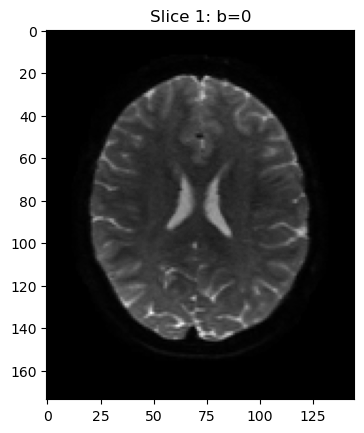

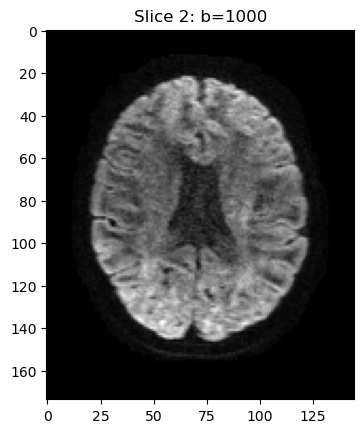

In [4]:
# Display 2 slices
slice1 = dwis[0,:,:,71]
slice2 = dwis[1,:,:,71]

plt.imshow(np.flipud(slice1.T), interpolation=None, cmap='gray')
plt.title("Slice 1: b=0")
plt.show()

plt.imshow(np.flipud(slice2.T), interpolation=None, cmap='gray')
plt.title("Slice 2: b=1000")
plt.show()

$\hat{q}$ is a 2D array which contains gradient directions in such a way that the $x$,$y$ and $z$ components are stored in separate 1D arrays. Contents of $\hat{q}$ can be seen below.

In [5]:
# Load gradient directions
bvecs = open('./data/bvecs', 'r')
qhat = bvecs.readlines()
bvecs.close()

# Remove newline characters
qhat = [line.strip('\n') for line in qhat]

#Split lines into components
qhat = [line.split() for line in qhat]

# Convert to double
qhat = np.asarray(qhat, dtype=np.double)

print('qhat = ')
print(qhat)
print("qhat shape: "+str(qhat.shape))
print("qhat type: "+str(type(qhat)))

qhat = 
[[ 0.       -0.93916   0.20412  -0.27643  -0.2196   -0.45469   0.
  -0.87544  -0.5209    0.79567  -0.49424  -0.44818   0.       -0.60534
  -0.17108  -0.88049   0.86169   0.017599  0.       -0.017846 -0.089202
   0.62075   0.68367   0.57191   0.        0.1895    0.99247  -0.24988
   0.57066   0.59536   0.        0.84897  -0.70476   0.12819  -0.48873
   0.81024   0.        0.37821  -0.14917  -0.38834  -0.47191   0.97729
   0.       -0.12841  -0.27272  -0.70383   0.823     0.20941   0.
  -0.67617   0.28501   0.92047  -0.21659   0.482     0.        0.16349
  -0.71752  -0.35228   0.78406  -0.67237   0.        0.71373  -0.9361
   0.019184 -0.38669   0.49837   0.       -0.020828  0.96878   0.913
  -0.13816   0.35645   0.       -0.11562  -0.49956  -0.49193   0.64308
  -0.27074   0.        0.80118  -0.65216  -0.37104  -0.91987  -0.35826
   0.        0.030761  0.77703  -0.79173  -0.090097 -0.37099   0.
  -0.65096   0.86124  -0.60639   0.30956   0.74561   0.        0.015152
  -0.18275   0

The list of b-values corresponding to each 3D image can be seen below.

In [6]:
# Compute b-values
bvals = 1000*np.sum(np.multiply(qhat, qhat) , axis=0);

print('bvals = ')
print(bvals)
print("bvals shape: "+str(bvals.shape))
print("bvals type: "+str(type(bvals)))

bvals = 
[   0.          999.9979541  1000.0003225   999.9901514   999.9904009
  999.9995346     0.          999.9931716  1000.0035377   999.9971147
  999.994605   1000.003722      0.          999.9946678  1000.0072434
 1000.0030482  1000.0030427  1000.00929654    0.         1000.00975422
  999.9864082  1000.01100404 1000.0000789   999.99840823    0.
  999.9984888  1000.00072502  999.9973682  1000.0083116  1000.0035549
    0.          999.9925813  1000.0005604   999.9933634  1000.0063258
 1000.0073512     0.          999.99300462  999.9939206  1000.0071861
  999.9927678  1000.0049546     0.         1000.0051577   999.98777875
  999.9966755   999.9923693   999.9935673     0.          999.9970373
  999.9895238  1000.0004074   999.9927809  1000.00562172    0.
 1000.0059341   999.9967629   999.9921234   999.98836005  999.9982173
    0.         1000.0017242  1000.00294442 1000.00388436 1000.00237899
 1000.0046619     0.         1000.00694968 1000.00597762  999.99959903
 1000.0011997  1000.0